<a href="https://colab.research.google.com/github/andrybrew/IHT-SEM1302-30Okt/blob/main/practice_material/text_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Text Network Analysis**

##**Importing required libraries**

In [1]:
# Import the necessary libraries
import requests
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

##**Importing Dataset**

In [2]:
# Fetching the dataset from GitHub
data_url = "https://raw.githubusercontent.com/andrybrew/IHT-SEM1302-30Okt/main/data/001_suku-bunga.csv"

# Using pandas read_csv function to load the data from the URL directly into a DataFrame
df_tweet = pd.read_csv(data_url)

## **Text Network Analysis Process**

###Dataset Preprocessing

In [3]:
# Create dataframe
df_tna = pd.DataFrame(df_tweet['text'].str.lower().str.replace(r'[^\w\s]','')) #punctuation removal and conversion to lowercase.
df_tna

<ipython-input-3-34a7b7ae2b5e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tna = pd.DataFrame(df_tweet['text'].str.lower().str.replace(r'[^\w\s]','')) #punctuation removal and conversion to lowercase.


,text
0,disiplin fiskal rasio utang lebih dari 60 dari...
1,bi kerek suku bunga acuan pengusaha berharap r...
2,breaking bank indonesia menaikkan suku bunga a...
3,eurusd menanti kebijakan suku bunga ecb anal...
4,muncul di browse youtube gua video finfluencer...
...,...
498,terbaru konsensus ekonom ramal bi tahan suku b...
499,ihsg diprediksi sideways menanti suku bunga bi...
500,selepas keluar dari mesir bani israil mendirik...
501,pagi semalam bursa as ditutup melemah di tenga...


###Building the Network Graph

In [4]:
# Create empty graph
G = nx.Graph()

In [5]:
# For each row in dataframe
for index, row in df_tna.iterrows():

    # Split tittle into words
    words = row['text'].split(' ')

    # Add relationships between words
    for w1 in words:
        for w2 in words:
            if w1 != w2:
                G.add_edge(w1,w2)

##Visualizing the Network


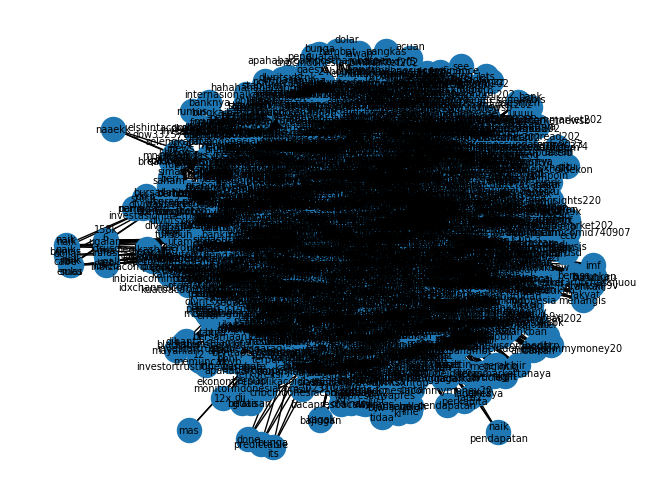

In [6]:
# Visualize the graph
nx.draw(G, font_size = 7, with_labels = True)

In [7]:
nx.write_edgelist(G, "text_network_edgelist.csv", delimiter=",", data=False)